# Objective:
You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

## Business and Data Understanding:
Spark Funds has two minor constraints for investments:
1. It wants to invest between 5 to 15 million USD per round of investment
2. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

## Business objective: 
The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

Importing Libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Checkpoint 1: Data Cleaning 
Reading and Cleaning Data


Load the companies and rounds data into two data frames and name them companies and rounds2 respectively.

In [2]:
companies = pd.read_csv('companies.csv',encoding='ISO-8859-1',sep=',')
companies.permalink = companies.permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies.name = companies.name.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
rounds2 = pd.read_csv('rounds2.csv',encoding='ISO-8859-1')
rounds2.company_permalink = rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


### Understand the Data Set 

1. How many unique companies are present in rounds2?	
2. How many unique companies are present in companies?	                       
3. In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.	 
4. Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N	 
5. Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

Getting Shape of Companies Dataframe

In [4]:
companies.shape

(66368, 10)

Getting Shape of Rounds Dataframe

In [5]:
rounds2.shape

(114949, 6)

Creating unique in Upper case in Both datframe in order to remove Case Sensitivity

In [6]:
companies["permalink"] = companies['permalink'].str.upper()
rounds2["company_permalink"] = rounds2['company_permalink'].str.upper()

## How many unique companies are present in rounds2?

In [7]:
# Unique Companies in rounds2 Dataframe
len(rounds2['company_permalink'].unique())

66368

## How many unique companies are present in companies?

In [8]:
# Unique Companies in companies Dataframe
len(companies['permalink'].unique())

66368

## Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

In [9]:
set(companies['permalink']) == set(rounds2['company_permalink'])

True

Merging Two Dataframes on Respective UniqueKey Column.

In [10]:
master_frame=pd.merge(rounds2, companies, how="left", left_on='company_permalink',right_on='permalink')

## How many observations are present in master_frame?

Getting Shape of Master Dataframe

In [11]:
master_frame.shape

(114949, 16)

### Checkpoint 2: Funding Type Analysis

Cleaning the Data


1. Inspecting Null Values
2. Dropping unnecessary columns
3. Dropping unnecessary rows

In [12]:
#Inspecting null Values across all columns
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [13]:
#Inspecting null Values Percentage
(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

### Dropping unnecessary columns
For Sparks Funds, we are mostly driving our analysis based on funding round type, category, country etc. Hence, so many columns present in the master_frame are not needed, we will drop those columns.

In [14]:
master_frame= master_frame.drop(['funding_round_permalink', 'funding_round_code', 'funded_at','permalink', 'homepage_url',
                                 'status','state_code', 'region', 'city', 'founded_at'],axis=1)

In [15]:
#Inspecting null Values Percentage Again
(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
name                   0.00
category_list          2.97
country_code           7.55
dtype: float64

### Removing rows with Null Values 

In [16]:
master_frame.dropna(inplace=True)

In [17]:
#Inspecting null Values Percentage Again
(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink     0.0
funding_round_type    0.0
raised_amount_usd     0.0
name                  0.0
category_list         0.0
country_code          0.0
dtype: float64

In [18]:
#Data Retained
print(100*(len(master_frame.index)/114949))

77.01502405414575


In [19]:
master_frame.shape

(88528, 6)

### Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) 

Retain only four funding types (venture, angel, seed, and private equity)

In [20]:
master_frame.funding_round_type.value_counts()

venture                  47809
seed                     21094
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [21]:
master_frame = master_frame[master_frame.funding_round_type.isin(['venture','seed','angel','private_equity'])]

In [22]:
#calculating average investment amount for each of the four funding types.
round(master_frame.groupby(['funding_round_type']).raised_amount_usd.mean(), 2)

funding_round_type
angel               971573.89
private_equity    73938486.28
seed                747827.95
venture           11724222.69
Name: raised_amount_usd, dtype: float64

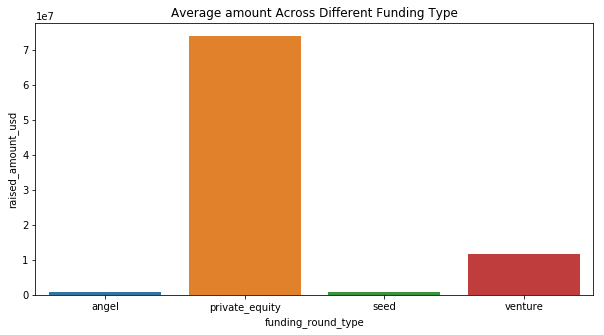

In [23]:
df = master_frame.groupby(['funding_round_type']).raised_amount_usd.mean().reset_index()
plt.figure(figsize=[10,5])
sns.barplot(df.funding_round_type,df.raised_amount_usd)
plt.title("Average amount Across Different Funding Type") 
plt.show()

Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for it? Identify the investment type and, for further analysis, filter the data so it only contains the chosen investment type.

<b>Since Amount to invest is between 5 to 15 Million USD, On venture is Satisfying that criteria.<b>

In [24]:
# Filtering Data and keeping funding_round_type only as venture
master_frame=master_frame[master_frame.funding_round_type=='venture']

In [25]:
# dropping funding_round_type column as all the values are ventures only
master_frame = master_frame.drop(['funding_round_type'], axis = 1)

In [26]:
master_frame.shape

(47809, 5)

### Checkpoint 3: Country Analysis

Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.
1. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)
2. For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

Identify the top three English-speaking countries in the data frame top9.

In [27]:
top9 = master_frame.groupby(['country_code'])['raised_amount_usd'].agg("sum").reset_index().sort_values('raised_amount_usd',ascending=False).iloc[:9]
print(top9)

   country_code  raised_amount_usd
94          USA       4.200680e+11
15          CHN       3.933892e+10
29          GBR       2.007281e+10
39          IND       1.426151e+10
12          CAN       9.482218e+09
28          FRA       7.226851e+09
42          ISR       6.854350e+09
21          DEU       6.306922e+09
45          JPN       3.167647e+09


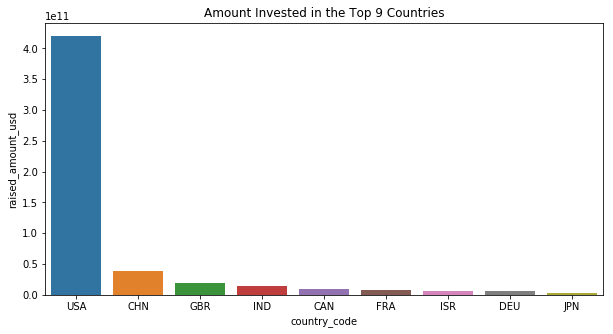

In [28]:
plt.figure(figsize=[10,5])
sns.barplot(top9.country_code,top9.raised_amount_usd)
plt.title("Amount Invested in the Top 9 Countries") 
plt.show()

In [29]:
#Filtering data on top 3 English speaking Countries 
master_frame=master_frame[master_frame.country_code.isin(['USA','GBR','IND'])]

### Checkpoint 4: Sector Analysis 1
1. Extract the primary sector of each category list from the category_list column
1. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [30]:
#Extract Primary Sector only
master_frame.category_list = master_frame.category_list.apply(lambda x:x.split("|")[0])

### Read Mapping file and Map the same to one of the eight main sector

In [31]:
mapping = pd.read_csv("mapping.csv")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [32]:
# Replacing 0 with na. Example A0lytics --> Analytics
# Replacing 2.na with 2.0. Exmaple Enterprise 2.na --> Enterprise 2.0
mapping.category_list = mapping.category_list.replace({'0':'na','2.na':'2.0'}, regex=True)
mapping.category_list = mapping.category_list.replace({'2.na':'2.0'}, regex=True)

In [33]:
#Using melt() function to unpivot the table.
mapping = mapping.melt(id_vars=['category_list'], var_name='Sector')
mapping = mapping[mapping.value==1]
mapping.drop(['value'],axis=1,inplace=True)
mapping.head()

,category_list,Sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


### Merging Two Dataframes 

Type of join is inner hence whatever Category List that are present in Both the dataframes will only be considered

In [34]:
master_frame = master_frame.merge(mapping, how = 'inner', on ='category_list')
master_frame.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,Sector
0,/ORGANIZATION/-FAME,10000000.0,#fame,Media,IND,Entertainment
1,/ORGANIZATION/90MIN,15000000.0,90min,Media,GBR,Entertainment
2,/ORGANIZATION/90MIN,5800000.0,90min,Media,GBR,Entertainment
3,/ORGANIZATION/90MIN,18000000.0,90min,Media,GBR,Entertainment
4,/ORGANIZATION/ALL-DEF-DIGITAL,5000000.0,All Def Digital,Media,USA,Entertainment


In [35]:
len(master_frame.index)

38642

### Checkpoint 5: Sector Analysis 2

1. Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. 
2. The three data frames should contain all the columns of the master_frame along with the main sector and the primary sector. 
3. Using the three data frames, you can calculate the total number of investments and the total amount of investments in each main sector for each of the three countries.

In [36]:
D1 = master_frame[(master_frame['country_code'] == 'USA') & 
             (master_frame['raised_amount_usd'] >= 5000000) & 
             (master_frame['raised_amount_usd'] <= 15000000)]
D1_groupby = D1.groupby(['Sector'])['raised_amount_usd'].agg(['sum', 'count'])
D1 = D1.merge(D1_groupby, how='left', on ='Sector')
D1.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,Sector,sum,count
0,/ORGANIZATION/ALL-DEF-DIGITAL,5000000.0,All Def Digital,Media,USA,Entertainment,5.099198e+09,591
1,/ORGANIZATION/CHEFS-FEED,5000000.0,ChefsFeed,Media,USA,Entertainment,5.099198e+09,591
2,/ORGANIZATION/HUFFINGTONPOST,5000000.0,The Huffington Post,Media,USA,Entertainment,5.099198e+09,591
3,/ORGANIZATION/HUFFINGTONPOST,5000000.0,The Huffington Post,Media,USA,Entertainment,5.099198e+09,591
4,/ORGANIZATION/MATCHMINE,10000000.0,MatchMine,Media,USA,Entertainment,5.099198e+09,591


In [37]:
D2 = master_frame[(master_frame['country_code'] == 'GBR') & 
             (master_frame['raised_amount_usd'] >= 5000000) & 
             (master_frame['raised_amount_usd'] <= 15000000)]
D2_groupby = D2.groupby(['Sector'])['raised_amount_usd'].agg(['sum', 'count'])
D2 = D2.merge(D2_groupby, how='left', on ='Sector')
D2.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,Sector,sum,count
0,/ORGANIZATION/90MIN,15000000.0,90min,Media,GBR,Entertainment,4.827847e+08,56
1,/ORGANIZATION/90MIN,5800000.0,90min,Media,GBR,Entertainment,4.827847e+08,56
2,/ORGANIZATION/AIHIT,5500000.0,aiHit,Analytics,GBR,"Social, Finance, Analytics, Advertising",1.089404e+09,133
3,/ORGANIZATION/BRANDWATCH,6000000.0,Brandwatch,Analytics,GBR,"Social, Finance, Analytics, Advertising",1.089404e+09,133
4,/ORGANIZATION/DIGITAL-SHADOWS,8000000.0,Digital Shadows,Analytics,GBR,"Social, Finance, Analytics, Advertising",1.089404e+09,133


In [38]:
D3 = master_frame[(master_frame['country_code'] == 'IND') & 
             (master_frame['raised_amount_usd'] >= 5000000) & 
             (master_frame['raised_amount_usd'] <= 15000000)]
D3_groupby = D3.groupby(['Sector'])['raised_amount_usd'].agg(['sum', 'count'])
D3 = D3.merge(D3_groupby, how='left', on ='Sector')
D3.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,Sector,sum,count
0,/ORGANIZATION/-FAME,10000000.0,#fame,Media,IND,Entertainment,280830000.0,33
1,/ORGANIZATION/EKA-SOFTWARE-SOLUTIONS,6000000.0,Eka Software Solutions,Analytics,IND,"Social, Finance, Analytics, Advertising",550549550.0,60
2,/ORGANIZATION/EKA-SOFTWARE-SOLUTIONS,10000000.0,Eka Software Solutions,Analytics,IND,"Social, Finance, Analytics, Advertising",550549550.0,60
3,/ORGANIZATION/LOGINEXT-SOLUTIONS,10000000.0,LogiNext Solutions,Analytics,IND,"Social, Finance, Analytics, Advertising",550549550.0,60
4,/ORGANIZATION/MANTHAN-SYSTEMS,5700000.0,Manthan Systems,Analytics,IND,"Social, Finance, Analytics, Advertising",550549550.0,60


###  Total number of investments (count)

In [39]:
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

12012
619
328


### Total amount of investment (USD)

In [40]:
print(D1.raised_amount_usd.sum())
print(D2.raised_amount_usd.sum())
print(D3.raised_amount_usd.sum())

107318294664.0
5365228300.0
2949543602.0


## Top sector, second-top, third-top for D1 (based on count of investments)
### Number of investments in the top, second-top, third-top sector in D1

In [41]:
print(D1_groupby.sort_values('count',ascending=False))

                                                  sum  count
Sector                                                      
Others                                   2.632101e+10   2950
Social, Finance, Analytics, Advertising  2.380738e+10   2714
Cleantech / Semiconductors               2.120663e+10   2300
News, Search and Messaging               1.395957e+10   1582
Health                                   8.211859e+09    909
Manufacturing                            7.258553e+09    799
Entertainment                            5.099198e+09    591
Automotive & Sports                      1.454104e+09    167


## Top sector, second-top, third-top for D2 (based on count of investments)
### Number of investments in the top, second-top, third-top sector in D2

In [42]:
print(D2_groupby.sort_values('count',ascending=False))

                                                  sum  count
Sector                                                      
Others                                   1.283624e+09    147
Social, Finance, Analytics, Advertising  1.089404e+09    133
Cleantech / Semiconductors               1.150140e+09    128
News, Search and Messaging               6.157462e+08     73
Entertainment                            4.827847e+08     56
Manufacturing                            3.619403e+08     42
Health                                   2.145375e+08     24
Automotive & Sports                      1.670516e+08     16


## Top sector, second-top, third-top for D3 (based on count of investments)
### Number of investments in the top, second-top, third-top sector in D3

In [43]:
print(D3_groupby.sort_values('count',ascending=False))

                                                  sum  count
Sector                                                      
Others                                   1.013410e+09    110
Social, Finance, Analytics, Advertising  5.505496e+08     60
News, Search and Messaging               4.338345e+08     52
Entertainment                            2.808300e+08     33
Manufacturing                            2.009000e+08     21
Cleantech / Semiconductors               1.653800e+08     20
Health                                   1.677400e+08     19
Automotive & Sports                      1.369000e+08     13


In [44]:
#For the top sector USA , which company received the highest investment?
company = D1[D1['Sector']=='Others']
company = company.groupby(['company_permalink'])['raised_amount_usd'].agg('sum').reset_index().sort_values('raised_amount_usd',ascending=False)
print(company.head(1))

#For the second top sector USA , which company received the highest investment?
company = D1[D1['Sector']=='Social, Finance, Analytics, Advertising']
company = company.groupby(['company_permalink'])['raised_amount_usd'].agg('sum').reset_index().sort_values('raised_amount_usd',ascending=False)
print(company.head(1))

              company_permalink  raised_amount_usd
1942  /ORGANIZATION/VIRTUSTREAM         64300000.0
              company_permalink  raised_amount_usd
1430  /ORGANIZATION/SHOTSPOTTER         67933006.0


In [45]:
#For the top sector GBR , which company received the highest investment?
company = D2[D2['Sector']=='Others']
company = company.groupby(['company_permalink'])['raised_amount_usd'].agg('sum').reset_index().sort_values('raised_amount_usd',ascending=False)
print(company.head(1))

#For the second top sector GBR , which company received the highest investment?
company = D2[D2['Sector']=='Social, Finance, Analytics, Advertising']
company = company.groupby(['company_permalink'])['raised_amount_usd'].agg('sum').reset_index().sort_values('raised_amount_usd',ascending=False)
print(company.head(1))

               company_permalink  raised_amount_usd
35  /ORGANIZATION/ELECTRIC-CLOUD         37000000.0
                      company_permalink  raised_amount_usd
21  /ORGANIZATION/CELLTICK-TECHNOLOGIES         37500000.0


In [46]:
#For the top sector IND , which company received the highest investment?
company = D3[D3['Sector']=='Others']
company = company.groupby(['company_permalink'])['raised_amount_usd'].agg('sum').reset_index().sort_values('raised_amount_usd',ascending=False)
print(company.head(1))

#For the second top sector IND , which company received the highest investment?
company = D3[D3['Sector']=='Social, Finance, Analytics, Advertising']
company = company.groupby(['company_permalink'])['raised_amount_usd'].agg('sum').reset_index().sort_values('raised_amount_usd',ascending=False)
print(company.head(1))

             company_permalink  raised_amount_usd
27  /ORGANIZATION/FIRSTCRY-COM         39000000.0
                company_permalink  raised_amount_usd
31  /ORGANIZATION/MANTHAN-SYSTEMS         50700000.0


In [47]:
USA = D1_groupby.sort_values('count',ascending=False).head(n=3)
USA['Country'] = 'USA'
GBR = D2_groupby.sort_values('count',ascending=False).head(n=3)
GBR['Country'] = 'GBR'
IND = D3_groupby.sort_values('count',ascending=False).head(n=3)
IND['Country'] = 'IND'
ALL=pd.concat([USA,GBR,IND]).reset_index()

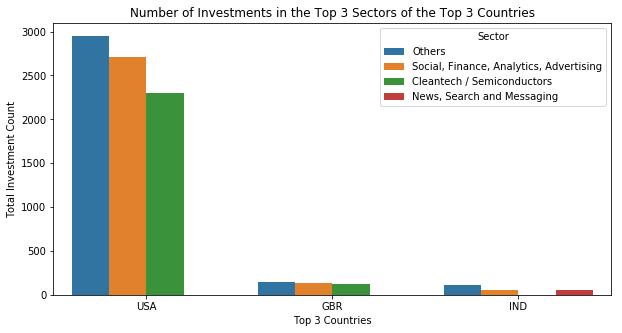

In [48]:
plt.figure(figsize=[10,5])
sns.barplot(x='Country', y='count', hue='Sector',data=ALL)
plt.ylabel("Total Investment Count")
plt.xlabel("Top 3 Countries")
plt.title("Number of Investments in the Top 3 Sectors of the Top 3 Countries") 
plt.show()